In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Synthetic Dataset Generation


In [3]:
size = 1000

In [10]:
# Generate two classes out of normal distributions - good classifier
class1_good_x = np.random.normal(loc = 10, scale = 1, size = size)
class1_good_y = np.random.normal(loc = 1, scale = 1, size = size)

class2_good_x = np.random.normal(loc = 1, scale = 1, size = size)
class2_good_y = np.random.normal(loc = 5, scale = 1, size = size)

df_class1 = pd.DataFrame({'x' : class1_good_x, 'y' : class1_good_y, 'class': 0})
df_class2 = pd.DataFrame({'x' : class2_good_x, 'y' : class2_good_y, 'class': 1})
df_good = pd.concat([df_class1, df_class2], ignore_index = True)


In [12]:
# Generate two classes normal distributions, but overlapping each other - medium classifier
class1_medium_x = np.random.normal(loc = 10, scale = 5, size = size)
class1_medium_y = np.random.normal(loc = 1, scale = 5, size = size)

class2_medium_x = np.random.normal(loc = 1, scale = 5, size = size)
class2_medium_y = np.random.normal(loc = 5, scale = 5, size = size)

df_class1 = pd.DataFrame({'x' : class1_medium_x, 'y' : class1_medium_y, 'class': 0})
df_class2 = pd.DataFrame({'x' : class2_medium_x, 'y' : class2_medium_y, 'class': 1})
df_medium = pd.concat([df_class1, df_class2], ignore_index = True)


In [13]:
# Generate two classes out of normal distributions - bad classifier
class1_bad_x = np.random.normal(loc = 10, scale = 5, size = size)
class1_bad_y = np.random.normal(loc = 1, scale = 5, size = size)

class2_bad_x = class1_bad_x + np.random.normal(loc = 1, scale = 1, size = size)
class2_bad_y = class1_bad_y + np.random.normal(loc = 1, scale = 1, size = size)

df_class1 = pd.DataFrame({'x' : class1_bad_x, 'y' : class1_bad_y, 'class': 0})
df_class2 = pd.DataFrame({'x' : class2_bad_x, 'y' : class2_bad_y, 'class': 1})
df_bad = pd.concat([df_class1, df_class2], ignore_index = True)


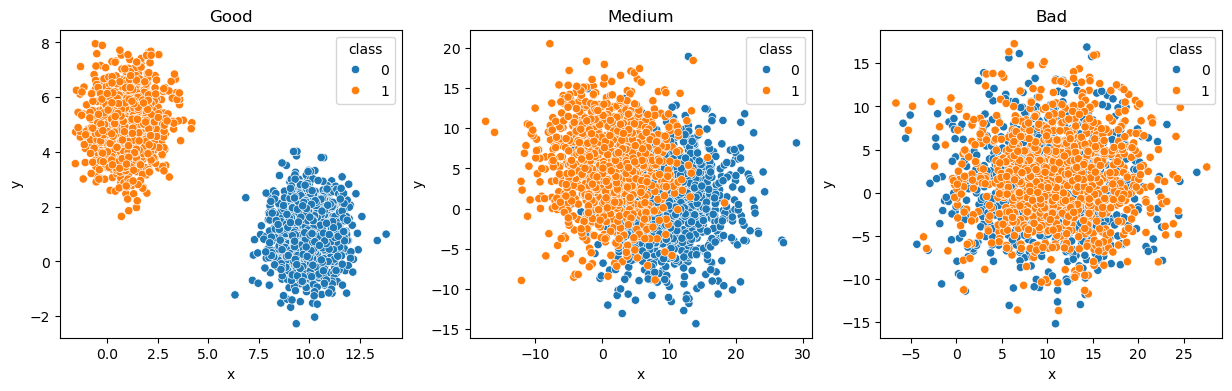

In [14]:
# Plot all three
fig = plt.figure(figsize = (15, 4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(data = df_good, x = 'x', y = 'y', hue = 'class', ax = ax1)
sns.scatterplot(data = df_medium, x = 'x', y = 'y', hue = 'class', ax = ax2)
sns.scatterplot(data = df_bad, x = 'x', y = 'y', hue = 'class', ax = ax3)
ax1.set_title("Good")
ax2.set_title("Medium")
ax3.set_title("Bad")
plt.show()

## Model Training

In [15]:
# model_object = GaussianNB
# model_object = RandomForestClassifier
model_object = XGBClassifier

In [18]:
X_good, y_good = df_good.drop(columns = ["class"]), df_good["class"]
X_medium, y_medium = df_medium.drop(columns = ["class"]), df_medium["class"]
X_bad, y_bad = df_bad.drop(columns = ["class"]), df_bad["class"]

# Splits the datasets
X_good_train, X_good_test, y_good_train, y_good_test = train_test_split(X_good, y_good, test_size = 0.25)
X_medium_train, X_medium_test, y_medium_train, y_medium_test = train_test_split(X_medium, y_medium, test_size = 0.25)
X_bad_train, X_bad_test, y_bad_train, y_bad_test = train_test_split(X_bad, y_bad, test_size = 0.25)

In [19]:
def fit_model(model_object, X_train, y_train, X_test):
    # Create the model object
    model = model_object()
    # Fit the model to the training data
    model.fit(X_train, y_train)
    # Predict the classes on the test data
    y_pred= model.predict(X_test)
    # Predict the classes on the test data, and return the probabilities for each class
    y_proba = model.predict_proba(X_test)
    return model, y_pred, y_proba

In [23]:
model_good, y_pred_good, y_proba_good = fit_model(model_object, X_good_train, y_good_train, X_good_test)
model_medium, y_pred_medium, y_proba_medium = fit_model(model_object, X_medium_train, y_medium_train, X_medium_test)
model_bad, y_pred_bad, y_proba_bad = fit_model(model_object, X_bad_train, y_bad_train, X_bad_test)

/Users/codexplore/miniforge3/envs/ml_env/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/codexplore/miniforge3/envs/ml_env/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/codexplore/miniforge3/envs/ml_env/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

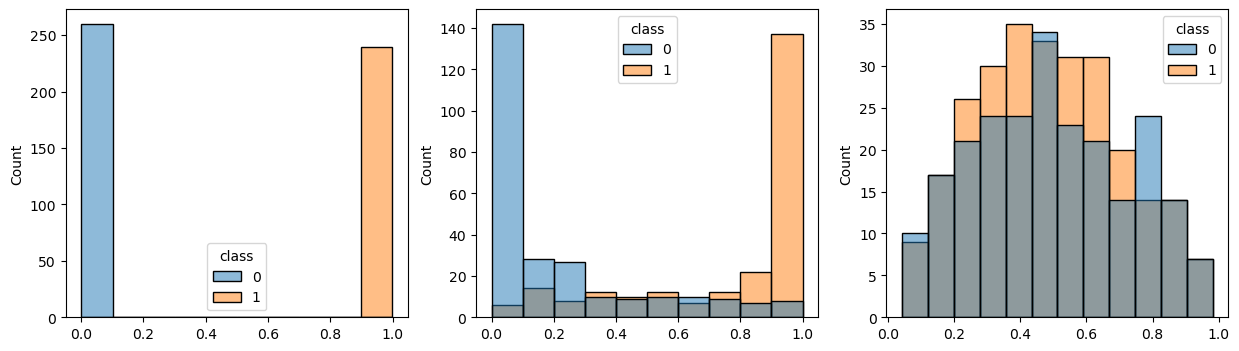

In [24]:
fig = plt.figure(figsize = (15, 4))
sns.histplot(x = y_proba_good[:, 1], hue = y_good_test, ax = plt.subplot(1, 3, 1))
sns.histplot(x = y_proba_medium[:, 1], hue = y_medium_test, ax = plt.subplot(1, 3, 2))
sns.histplot(x = y_proba_bad[:, 1], hue = y_bad_test, ax = plt.subplot(1, 3, 3))
plt.show()

## Lift

In [32]:
def plot_lift(y_real, y_proba, ax = None, color = 'b', title = 'Lift Curve'):
    # Prepare the data
    aux_df = pd.DataFrame()
    aux_df['y_real'] = y_real
    aux_df['y_proba'] = y_proba
    # Sort by predicted probability
    aux_df = aux_df.sort_values('y_proba', ascending = False)
    # Find the total positive ratio of the whole dataset
    total_positive_ratio = sum(aux_df['y_real'] == 1) / aux_df.shape[0]
    # For each line of data, get the ratio of positives of the given subset and calculate the lift
    lift_values = []
    for i in aux_df.index:
        threshold = aux_df.loc[i]['y_proba']
        subset = aux_df[aux_df['y_proba'] >= threshold]
        subset_positive_ratio = sum(subset['y_real'] == 1) / subset.shape[0]
        lift = subset_positive_ratio / total_positive_ratio
        lift_values.append(lift)
    # Plot the lift curve
    if ax == None:
        ax = plt.axes()
    ax.set_xlabel('Proportion of sample')
    ax.set_ylabel('Lift')
    ax.set_title(title)
    sns.lineplot(x = [x/len(lift_values) for x in range(len(lift_values))], y = lift_values, ax = ax, color = color)
    ax.axhline(1, color = 'gray', linestyle = 'dashed', linewidth = 3)

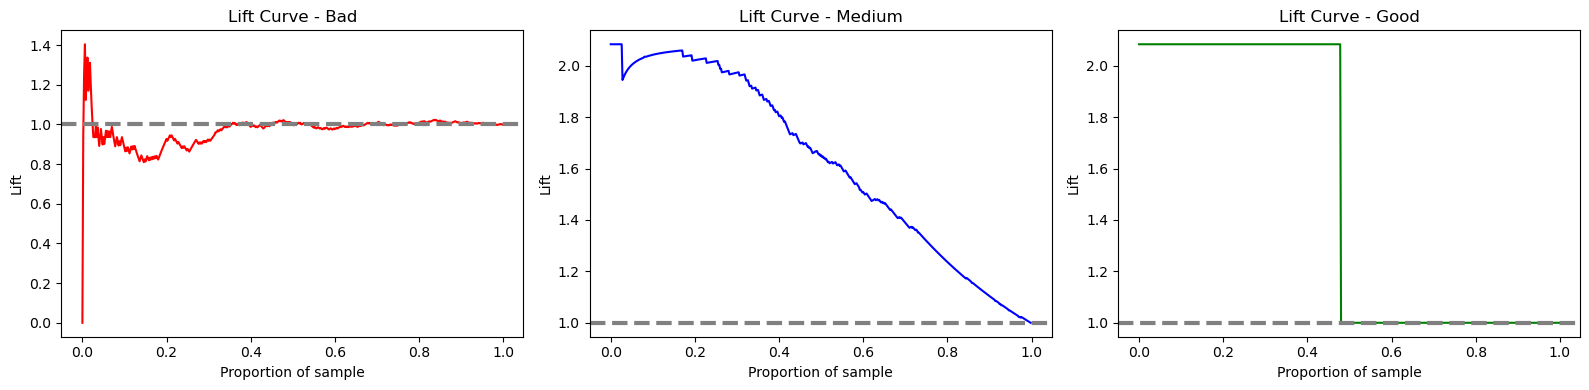

In [33]:
plt.figure(figsize = (16,4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
plot_lift(y_bad_test, y_proba_bad[:, 1], ax = ax1, color = 'r', title = "Lift Curve - Bad")
plot_lift(y_medium_test, y_proba_medium[:, 1], ax = ax2, color = 'b', title = "Lift Curve - Medium")
plot_lift(y_good_test, y_proba_good[:, 1], ax = ax3, color = 'g', title = "Lift Curve - Good")
plt.tight_layout()